# Diabetes Case Study
## Introduction
This project aims to analyze and predict diabetes outcomes based on a variety of health indicators. Diabetes is a chronic condition that affects millions worldwide, and early prediction can significantly improve management and treatment. The analysis leverages data science and machine learning techniques to provide insights and predictive models.

## Objectives
- Data Exploration and Visualization: Understand the dataset through summary statistics and visualizations.
- Data Preprocessing: Handle missing values, outliers, and feature scaling to prepare the data for modeling.
- Feature Selection: Identify the most significant features that contribute to diabetes prediction.
- Model Development: Build and evaluate multiple machine learning models to predict diabetes outcomes.
- Model Evaluation: Compare models using various performance metrics and select the best one.
- Interpretation and Insights: Draw meaningful conclusions and provide actionable insights based on the model's predictions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

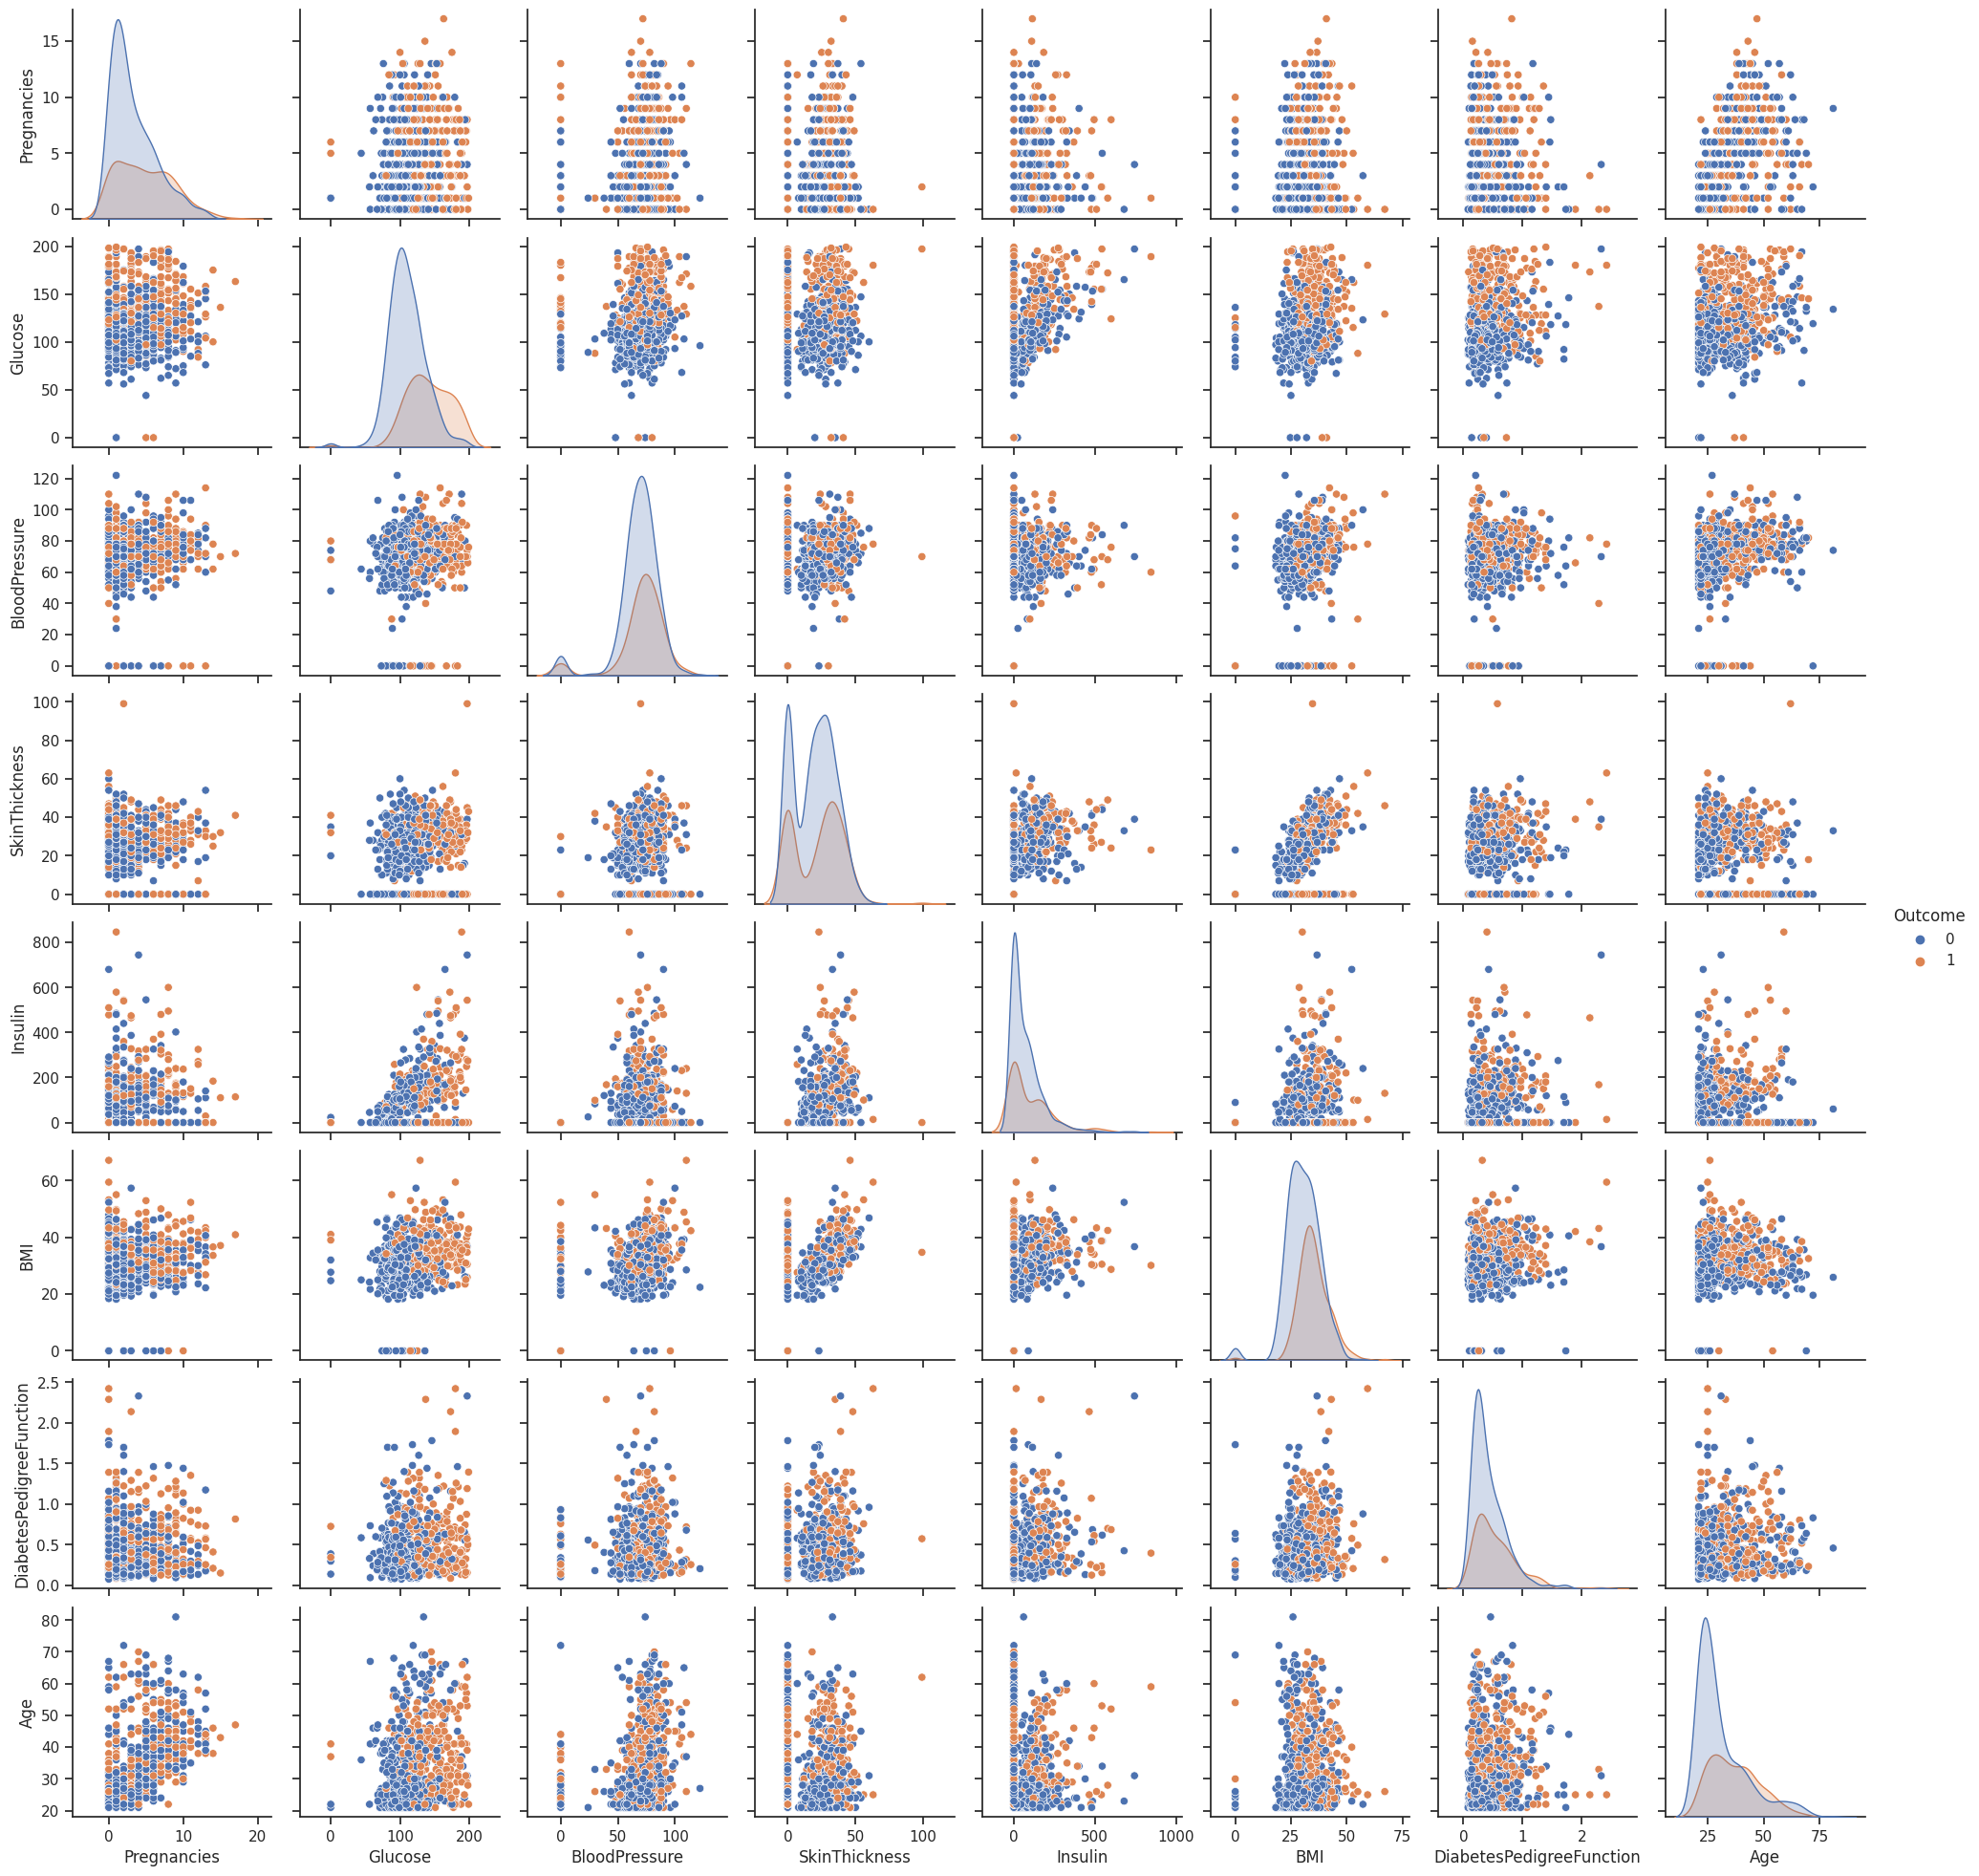

In [7]:
sns.pairplot(df, hue="Outcome")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

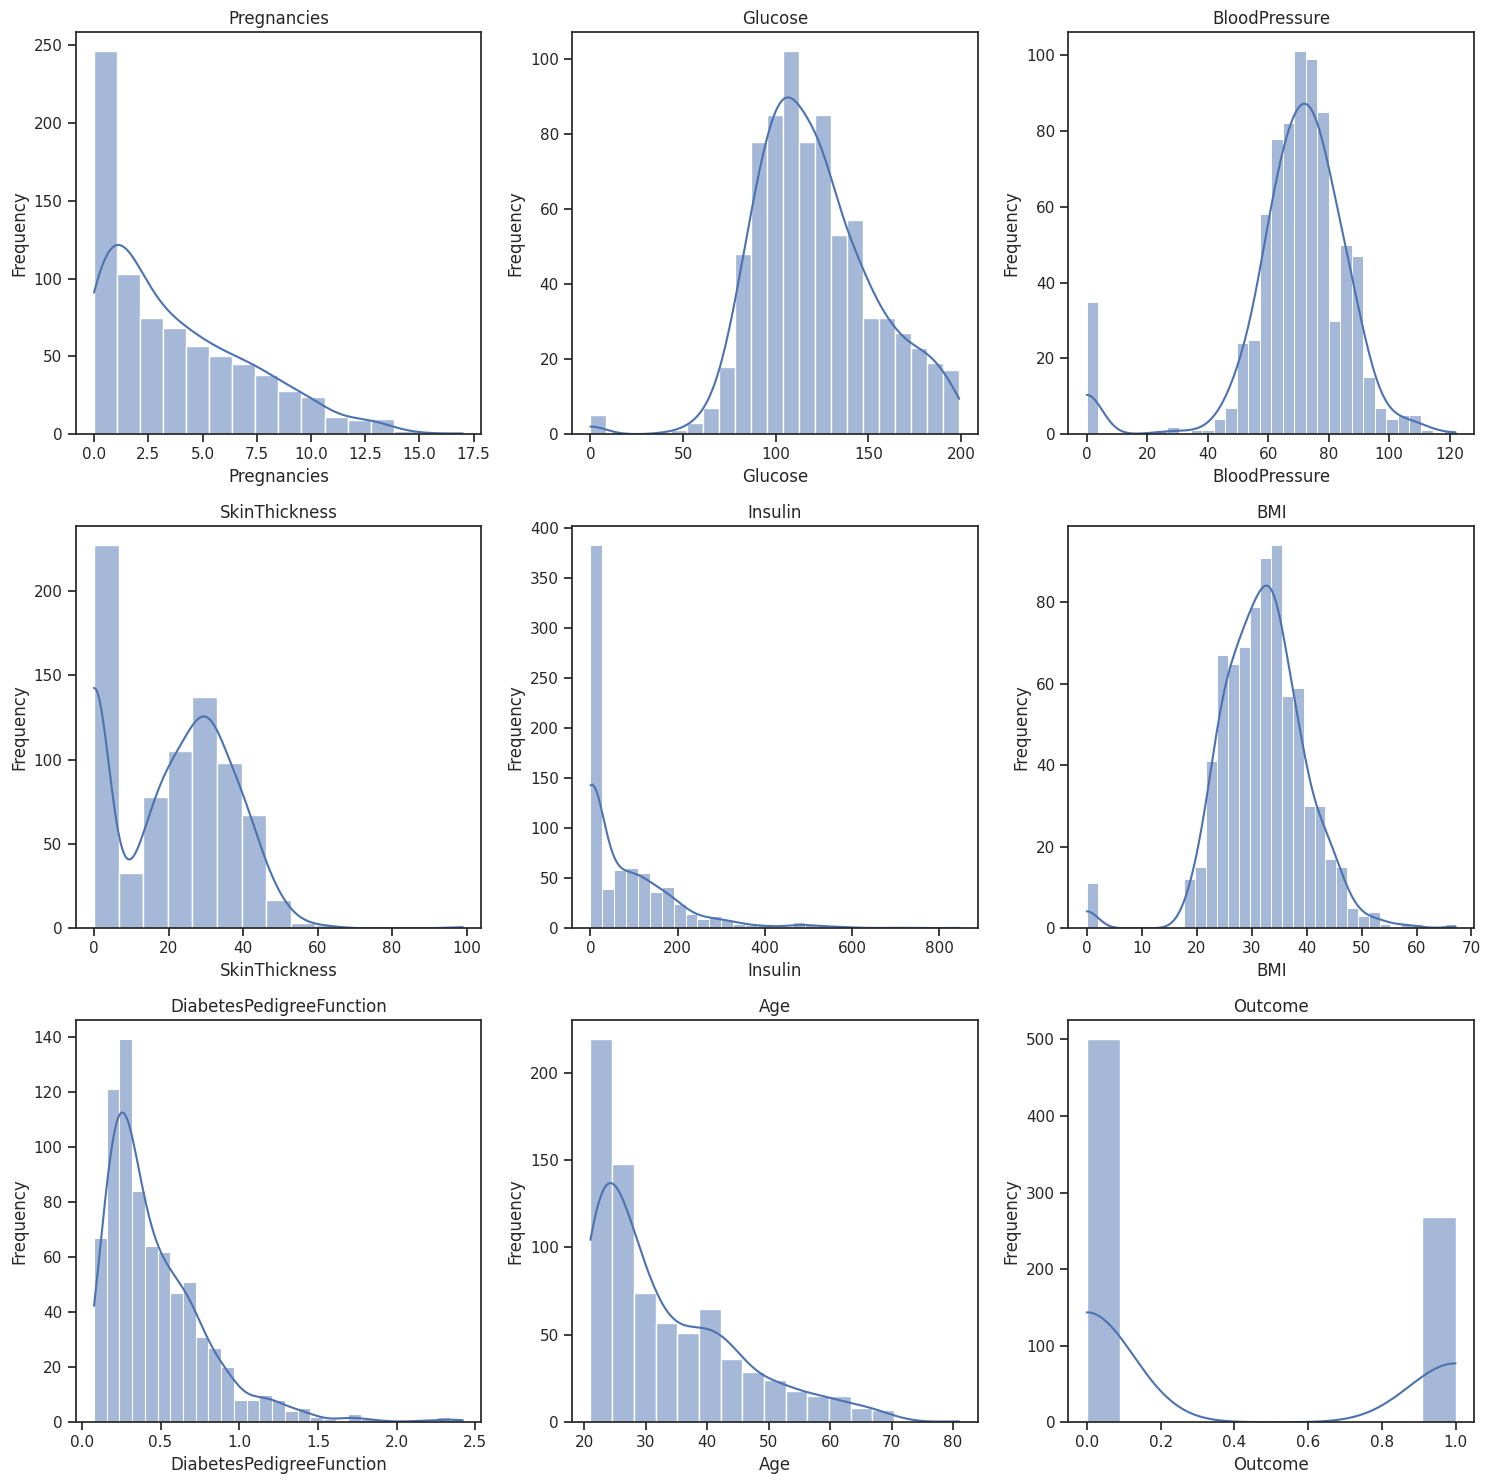

In [8]:
# Number of columns to plot
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for all columns in a single figure
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns


def check_one(answers_one):
    '''
    INPUT:
    answers_one - a dictionary with key-value pairs associated with question 1
    
    OUTPUT:
    nothing returned
    print a statement related to the correctness of the answers
    '''
    a = '0.65'
    b = '0'
    c = 'Age'
    d = '0.35'
    e = 'Glucose'
    f = '0.5'
    g = "More than zero"

    answers_one_1 = {
        'The proportion of diabetes outcomes in the dataset': d,
        'The number of missing data points in the dataset': b,
        'A dataset with a symmetric distribution': e,
        'A dataset with a right-skewed distribution': c, 
        'This variable has the strongest correlation with the outcome': e
    }
    
    if answers_one == answers_one_1:
        print("Awesome! These all look great!")
    
    if answers_one['The proportion of diabetes outcomes in the dataset'] != answers_one_1['The proportion of diabetes outcomes in the dataset']:
        print("Oops!  That doesn't look like the proportion of 1's in the outcomes column.  I saw closer to 35% using the describe() method.")

    if answers_one['The number of missing data points in the dataset'] != answers_one_1['The number of missing data points in the dataset']:
        print("Oops!  That doesn't look like the right number of missing values.  I actually couldn't find any missing values")
        
    if answers_one['A dataset with a symmetric distribution'] != answers_one_1['A dataset with a symmetric distribution']:
        print("Oops!  Of the two columns above, Glucose is actually the symmetric column.  You can see this by running the .hist() method on your dataframe.")
     
    if answers_one['A dataset with a right-skewed distribution'] != answers_one_1['A dataset with a right-skewed distribution']:
        print("Oops!  Of the two columns above, Age is actually the right-skewed column.  You can see this by running the .hist() method on your dataframe.")
        
    if answers_one['This variable has the strongest correlation with the outcome'] != answers_one_1['This variable has the strongest correlation with the outcome']:
        print("Oops!  Besides Outcome itself, the column that is most correlated with the Outcome variable is actually Glucose.")
        

def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 

    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')
        
        
def check_best(best_model):
    '''
    INPUT:
    best_model - a string of the best model
    
    OUTPUT:
    print a statement related to if the best model matches what the solution found
    '''
    a = 'randomforest'
    b = 'adaboost'
    c = 'supportvector'

    if best_model == b:
        print("Nice!  It looks like your best model matches the best model I found as well!  It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There might be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost again.  With recall, SVMs proved to be the best for our models.")
       
    else:
        print("That wasn't the model I had in mind... It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There could also be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost.  With recall, SVMs proved to be the best for our models.")
        
        
def check_q_seven(sol_seven):
    '''
    INPUT:
    solution dictionary for part seven
    OUTPUT:
    prints statement related to correctness of dictionary
    '''
    a = 'Age'
    b = 'BloodPressure'
    c = 'BMI'
    d = 'DiabetesPedigreeFunction'
    e = 'Insulin'
    f = 'Glucose'
    g = 'Pregnancy'
    h = 'SkinThickness'



    sol_seven_1 = {
        'The variable that is most related to the outcome of diabetes' : f,
        'The second most related variable to the outcome of diabetes' : c,
        'The third most related variable to the outcome of diabetes' : a,
        'The fourth most related variable to the outcome of diabetes' : d
    }

    if sol_seven == sol_seven_1:
        print("That's right!  Some of these were expected, but some were a bit unexpected too!")
              
    else:
        print("That doesn't look like what I expected, but maybe your feature importances were different - that can definitely happen.  Take a look at the best_estimator_.feature_importances_ portion of your fitted model.")
              
         

In [10]:
# Possible keys for the dictionary
a = '0.65'
b = '0'
c = 'Age'
d = '0.35'
e = 'Glucose'
f = '0.5'
g = "More than zero"

# Fill in the dictionary with the correct values here
answers_one = {
    'The proportion of diabetes outcomes in the dataset': d,
    'The number of missing data points in the dataset': b,
    'A dataset with a symmetric distribution': e,
    'A dataset with a right-skewed distribution': c, 
    'This variable has the strongest correlation with the outcome': e
}

# Just to check your answer, don't change this
check_one(answers_one)

Awesome! These all look great!


Step 2: Since our dataset here is quite clean, we will jump straight into the machine learning. Our goal here is to be able to predict cases of diabetes. First, you need to identify the y vector and X matrix. Then, the following code will divide your dataset into training and test data.

In [11]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

print_metrics(y_test, rf_preds, 'random forest')

Accuracy score for random forest : 0.7727272727272727
Precision score random forest : 0.6724137931034483
Recall score random forest : 0.7090909090909091
F1 score random forest : 0.6902654867256638





In [13]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for adaboost : 0.7532467532467533
Precision score adaboost : 0.6888888888888889
Recall score adaboost : 0.5636363636363636
F1 score adaboost : 0.6199999999999999





In [14]:
clf_svc = SVC()

param_dist = {"C":[0.1, 0.5, 1, 3, 5], "kernel": ['linear', 'rbf']}

svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

svc_search.fit(X_train, y_train)

svc_preds =  svc_search.best_estimator_.predict(X_test)

print_metrics(y_test, svc_preds, 'svc')

Accuracy score for svc : 0.7532467532467533
Precision score svc : 0.6545454545454545
Recall score svc : 0.6545454545454545
F1 score svc : 0.6545454545454545





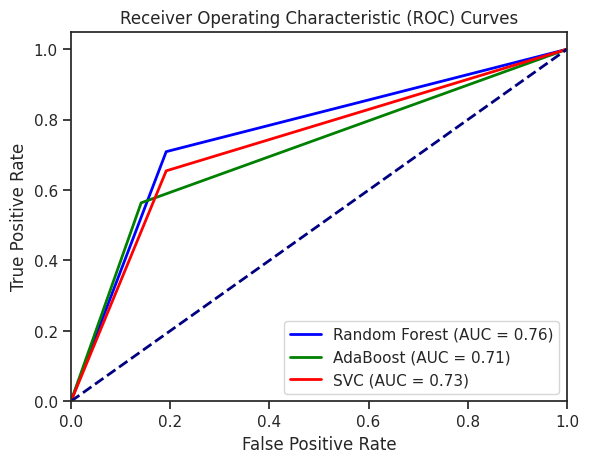

In [15]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_ab, tpr_ab, _ = roc_curve(y_test, ada_preds)
roc_auc_ab = auc(fpr_ab, tpr_ab)

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_preds)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curves
plt.figure()

plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_ab, tpr_ab, color='green', lw=2, label=f'AdaBoost (AUC = {roc_auc_ab:.2f})')
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

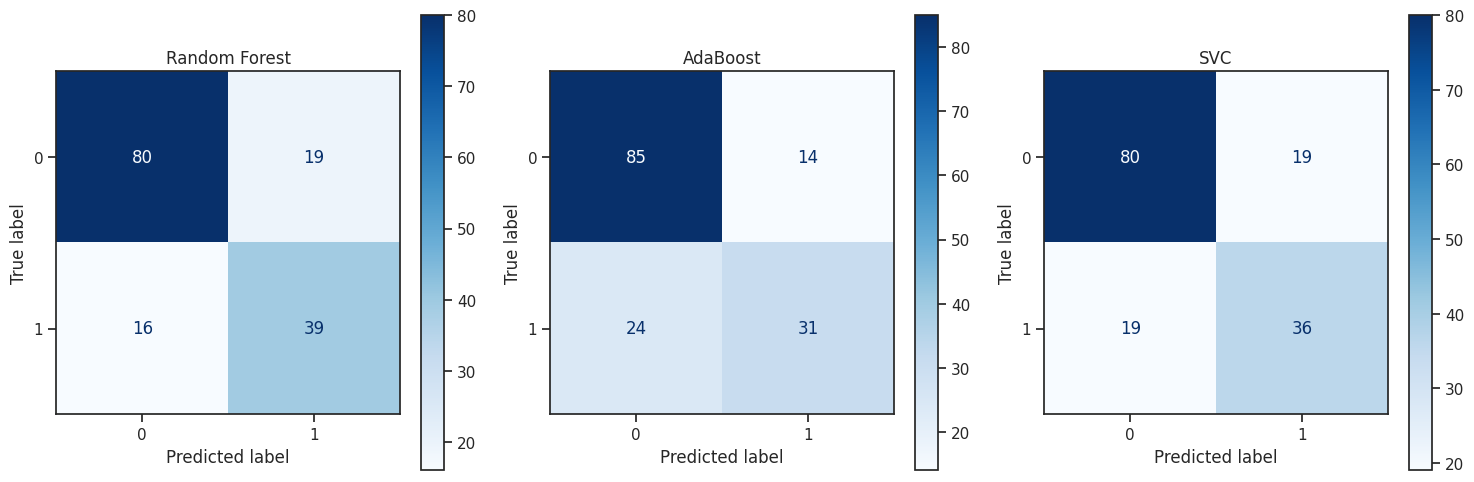

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrices
cm_rf = confusion_matrix(y_test, rf_preds)
cm_ab = confusion_matrix(y_test, ada_preds)
cm_svc = confusion_matrix(y_test, svc_preds)

# Tracer les matrices de confusion
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pour Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title('Random Forest')

# Pour AdaBoost
disp_ab = ConfusionMatrixDisplay(confusion_matrix=cm_ab)
disp_ab.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='d')
axes[1].set_title('AdaBoost')

# Pour SVC
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('SVC')

plt.tight_layout()
plt.show()

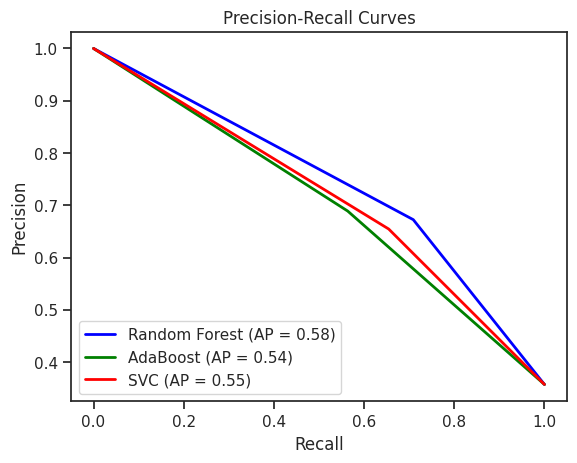

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall and plot curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_preds)
average_precision_rf = average_precision_score(y_test, rf_preds)

precision_ab, recall_ab, _ = precision_recall_curve(y_test, ada_preds)
average_precision_ab = average_precision_score(y_test, ada_preds)

precision_svc, recall_svc, _ = precision_recall_curve(y_test, svc_preds)
average_precision_svc = average_precision_score(y_test, svc_preds)

# Plot PR curves
plt.figure()

plt.plot(recall_rf, precision_rf, color='blue', lw=2, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.plot(recall_ab, precision_ab, color='green', lw=2, label=f'AdaBoost (AP = {average_precision_ab:.2f})')
plt.plot(recall_svc, precision_svc, color='red', lw=2, label=f'SVC (AP = {average_precision_svc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()


In [18]:
from sklearn.metrics import classification_report

# Print classification reports
print("Random Forest Classification Report")
print(classification_report(y_test, rf_preds))

print("AdaBoost Classification Report")
print(classification_report(y_test, ada_preds))

print("SVC Classification Report")
print(classification_report(y_test, svc_preds))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

SVC Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73  

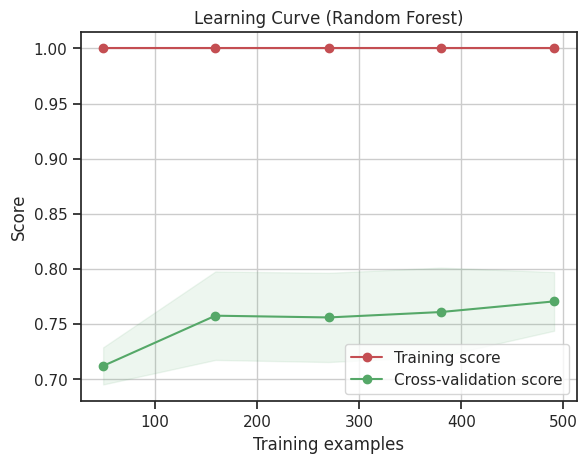

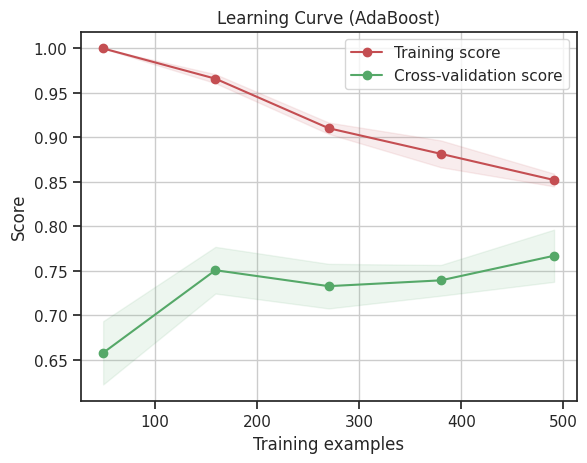

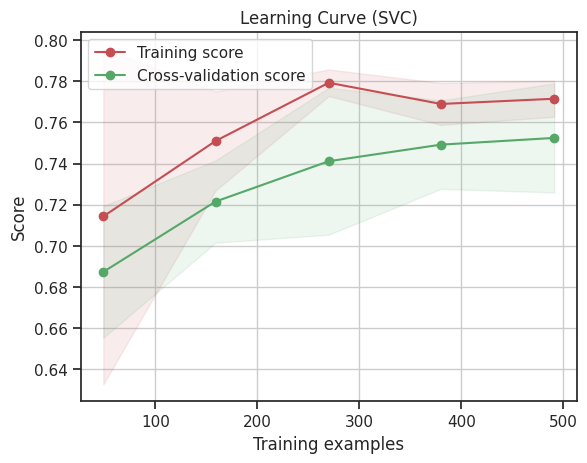

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for each model
plot_learning_curve(clf_rf, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plot_learning_curve(clf_ada, "Learning Curve (AdaBoost)", X_train, y_train, cv=5)
plot_learning_curve(clf_svc, "Learning Curve (SVC)", X_train, y_train, cv=5)
plt.show()


In [20]:
a = 'randomforest'
b = 'adaboost'
c = 'supportvector'

best_model =  b

# See if your best model was also mine.  
# Notice these might not match depending your search!
check_best(best_model)

Nice!  It looks like your best model matches the best model I found as well!  It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There might be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost again.  With recall, SVMs proved to be the best for our models.


Text(0.5, 0, 'Relative Importance')

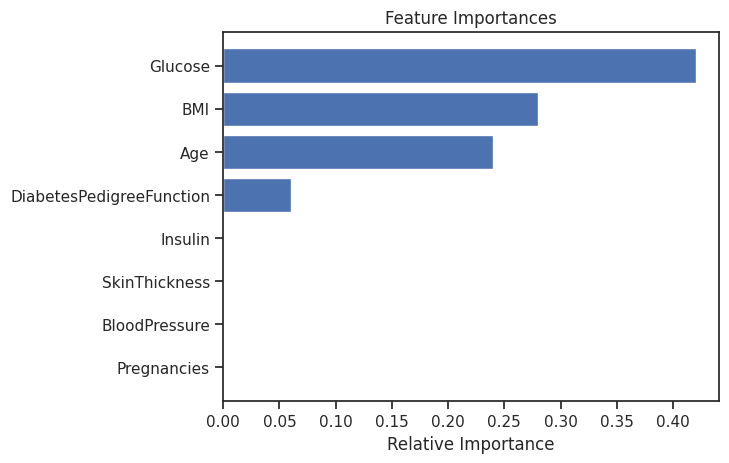

In [21]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

features = df.columns[:df.shape[1]]
importances = ada_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [22]:
# Check your solution by matching the correct values in the dictionary
# and running this cell
a = 'Age'
b = 'BloodPressure'
c = 'BMI'
d = 'DiabetesPedigreeFunction'
e = 'Insulin'
f = 'Glucose'
g = 'Pregnancy'
h = 'SkinThickness'



sol_seven = {
    'The variable that is most related to the outcome of diabetes' : f,
    'The second most related variable to the outcome of diabetes' : c,
    'The third most related variable to the outcome of diabetes' : a,
    'The fourth most related variable to the outcome of diabetes' : d
}

check_q_seven(sol_seven)

That's right!  Some of these were expected, but some were a bit unexpected too!
